In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [153]:
df = pd.read_csv("C:\\Users\\jsoor\\Downloads\\Student_Performance_dataset.csv")
df.head(100)

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76
...,...,...,...,...,...,...
95,96,Genderfluid,17,61.0,70.0,85
96,97,Genderfluid,12,84.0,68.0,60
97,98,Male,14,84.0,84.0,85
98,99,Female,16,94.0,69.0,92


In [154]:
df = df.drop('Student_ID',axis = 1)

In [155]:
df.shape

(1000, 5)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Age            1000 non-null   int64  
 2   English_Score  971 non-null    float64
 3   Math_Score     967 non-null    float64
 4   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [157]:
print(df.isna().sum())

Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64


In [158]:
df.describe()

,Age,English_Score,Math_Score,Science_Score
count,1000.000000,971.000000,967.000000,1000.000000
mean,14.970000,76.089598,76.660807,76.370000
std,1.959832,12.767113,12.541226,12.866649
min,12.000000,55.000000,55.000000,55.000000
25%,13.000000,65.000000,66.000000,65.000000
50%,15.000000,76.000000,76.000000,77.000000
75%,17.000000,88.000000,87.500000,87.000000
max,18.000000,98.000000,98.000000,98.000000


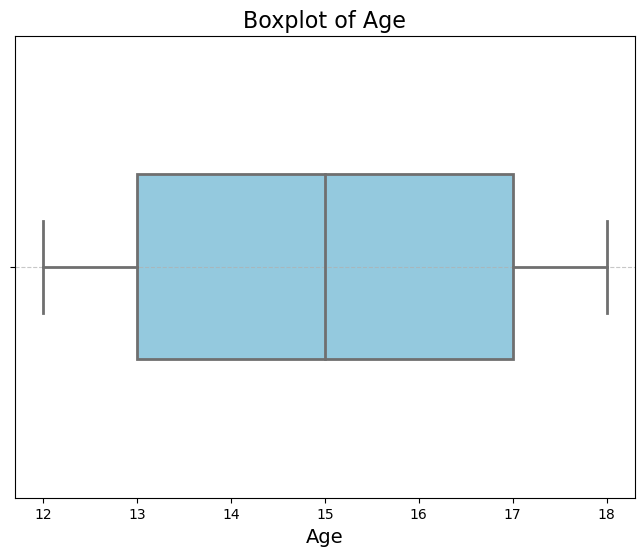

In [159]:
sns.set_palette("pastel")

# Create a boxplot with additional styling
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], width=0.4, color='skyblue', linewidth=2, fliersize=8)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set plot labels and title
plt.xlabel('Age', fontsize=14)
plt.title('Boxplot of Age', fontsize=16)

# Show the plot
plt.show()

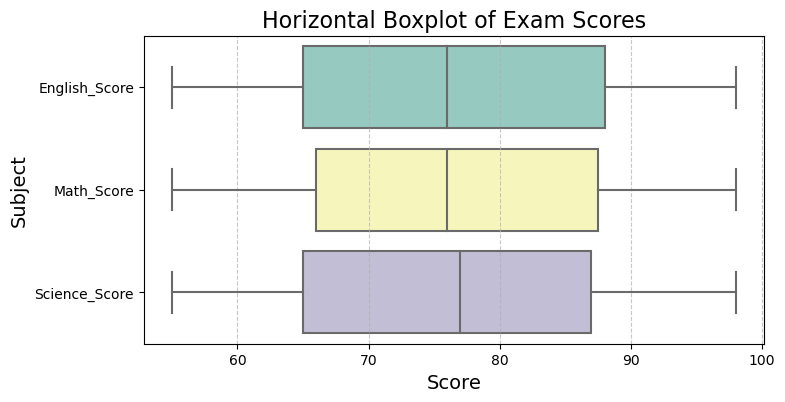

In [160]:
sns.set_palette("pastel")

selected_columns = ['English_Score', 'Math_Score', 'Science_Score']
df_selected = df[selected_columns]


# Set a custom color palette for better aesthetics
sns.set_palette("pastel")

# Create a horizontal boxplot for the selected columns
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_selected, orient='h', palette="Set3")

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set plot labels and title
plt.xlabel('Score', fontsize=14)
plt.ylabel('Subject', fontsize=14)
plt.title('Horizontal Boxplot of Exam Scores', fontsize=16)

# Show the plot
plt.show()

In [161]:
df['Gender'].nunique()

8

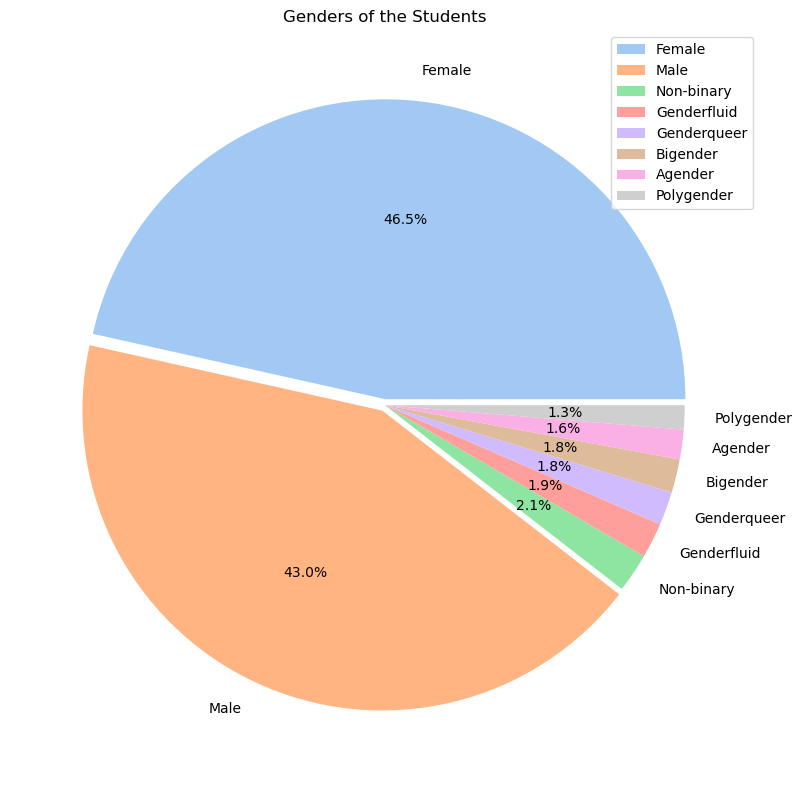

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor("white")

df["Gender"].value_counts().plot.pie(
    title="Genders of the Students",
    legend=True,
    autopct="%1.1f%%",
    explode=(0.02, 0.02, 0, 0, 0, 0, 0, 0),
    startangle=0,
)
plt.ylabel("")
plt.tight_layout()
plt.show()

In [163]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Replace True with 1 and False with 0
df = df.replace({True: 1, False: 0})

# Display the resulting DataFrame
df.head(20)

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18,64.0,56.0,60,0,1,0,0,0,0,0
1,12,89.0,71.0,97,0,1,0,0,0,0,0
2,18,69.0,69.0,80,0,1,0,0,0,0,0
3,17,60.0,72.0,97,0,1,0,0,0,0,0
4,13,71.0,76.0,76,0,0,0,0,1,0,0
5,12,83.0,61.0,60,0,1,0,0,0,0,0
6,12,68.0,73.0,93,0,1,0,0,0,0,0
7,18,84.0,84.0,79,0,1,0,0,0,0,0
8,14,94.0,71.0,94,0,1,0,0,0,0,0
9,17,92.0,92.0,69,0,0,0,0,1,0,0


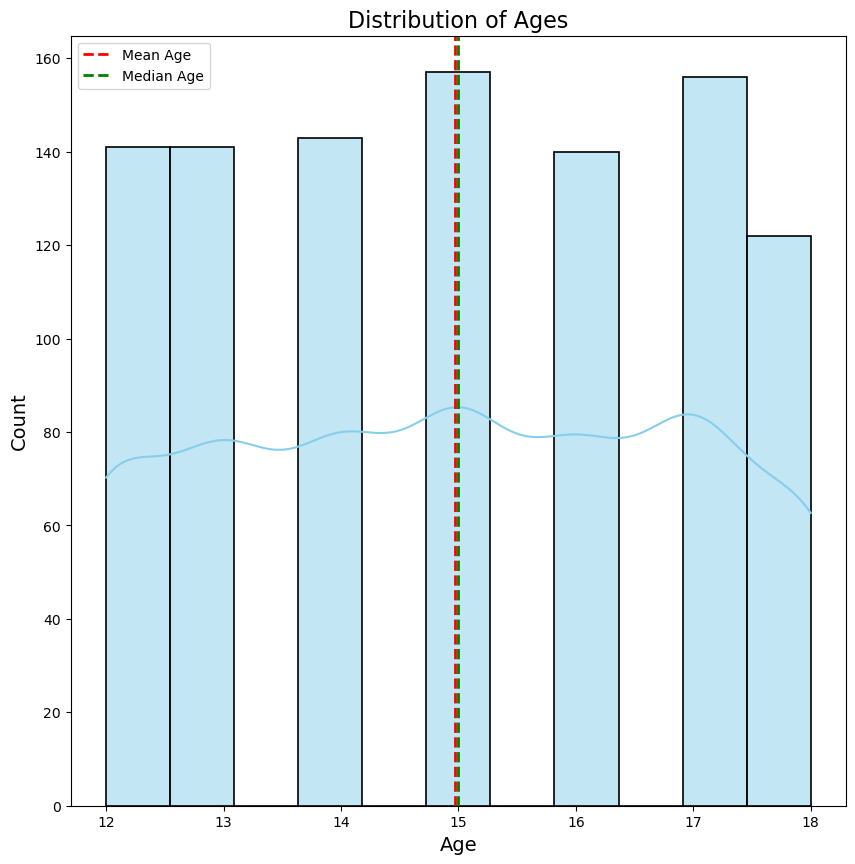

In [164]:
sns.set_palette("pastel")

# Create a histogram with enhanced aesthetics
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(df['Age'], bins="auto", kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Ages', fontsize=16)

# Add mean and median lines for better insight
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Age")
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label="Median Age")

# Show legend
plt.legend()

# Show the plot
plt.show()

In [165]:
df['Age'].nunique()

7

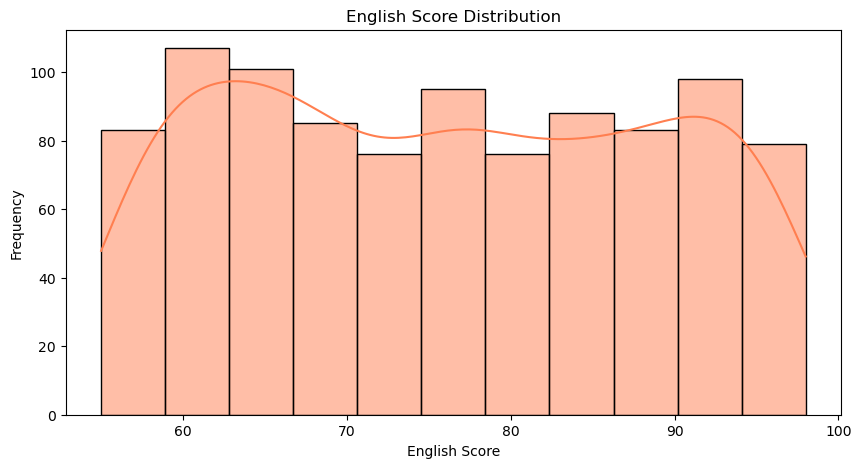

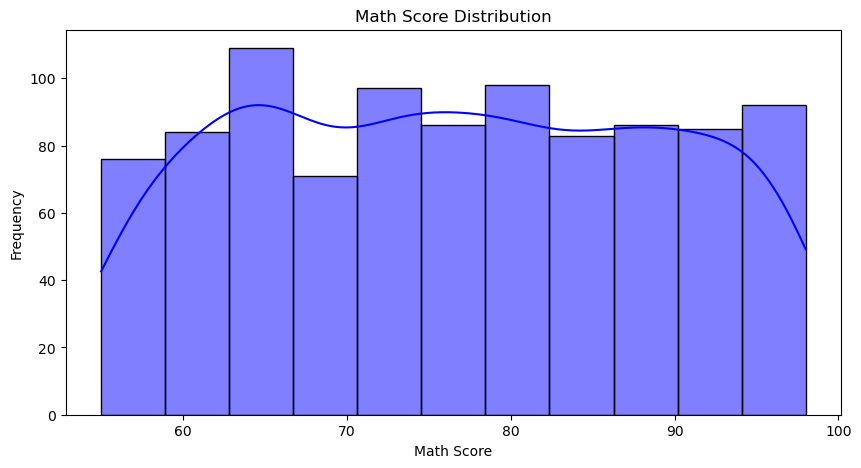

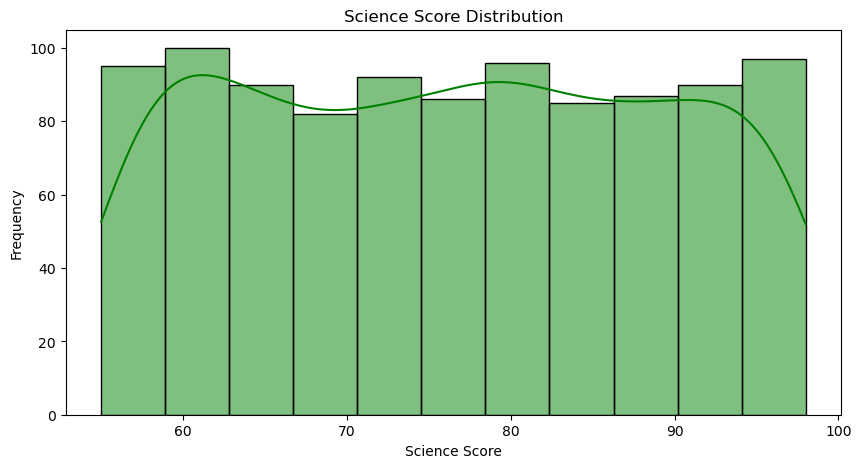

In [166]:
plt.figure(figsize=(10, 5))
sns.histplot(df['English_Score'], kde=True, color='coral')
plt.title('English Score Distribution')
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Math_Score'], kde=True, color='blue')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Science_Score'], kde=True, color='green')
plt.title('Science Score Distribution')
plt.xlabel('Science Score')
plt.ylabel('Frequency')
plt.show()

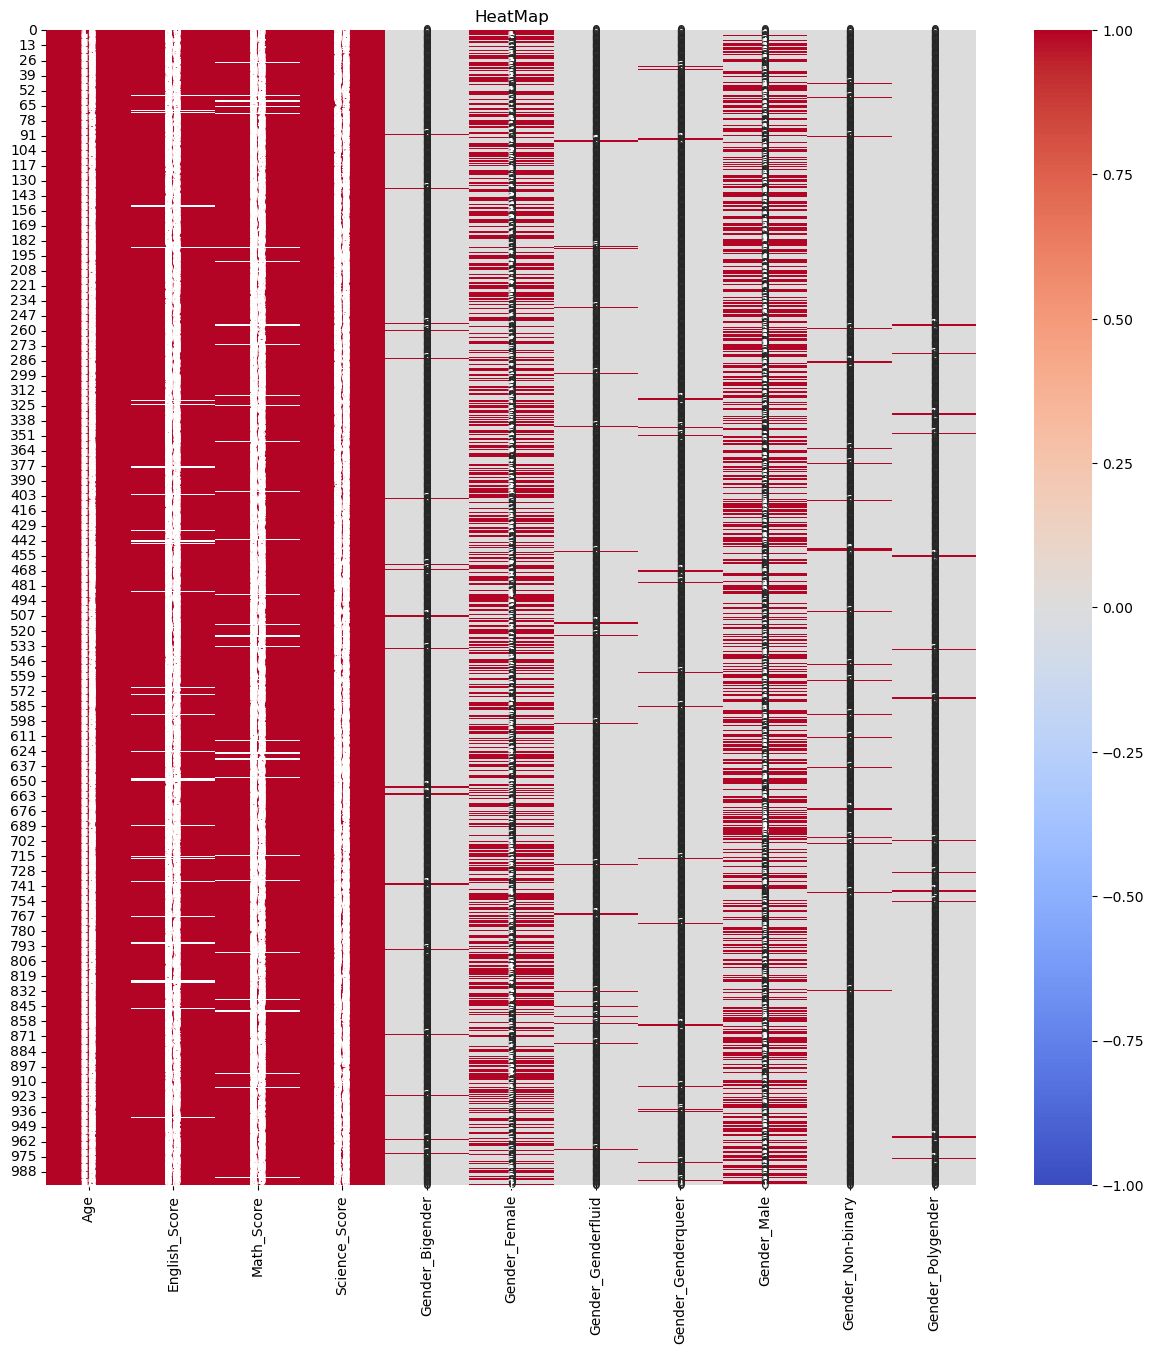

In [167]:
fig, ax = plt.subplots(figsize=(15, 15))
# pearson correlation matrix
sns.heatmap(data=df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("HeatMap")
plt.show()

# Imputing the dataset

In [168]:
print(df.isna().sum())

Age                    0
English_Score         29
Math_Score            33
Science_Score          0
Gender_Bigender        0
Gender_Female          0
Gender_Genderfluid     0
Gender_Genderqueer     0
Gender_Male            0
Gender_Non-binary      0
Gender_Polygender      0
dtype: int64


In [169]:
# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in numerical columns
df_imputed = imputer.fit_transform(df)


df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Display the imputed DataFrame
print("Imputed DataFrame:")
df_imputed

Imputed DataFrame:


,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18.0,64.0,56.0,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12.0,89.0,71.0,97.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,69.0,69.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,17.0,60.0,72.0,97.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13.0,71.0,76.0,76.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,14.0,64.0,55.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,14.0,66.0,60.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,16.0,82.0,81.0,74.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,14.0,76.0,62.0,62.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [170]:
print(df_imputed.isna().sum())

Age                   0
English_Score         0
Math_Score            0
Science_Score         0
Gender_Bigender       0
Gender_Female         0
Gender_Genderfluid    0
Gender_Genderqueer    0
Gender_Male           0
Gender_Non-binary     0
Gender_Polygender     0
dtype: int64


# Scaling The Dataset

In [171]:
# Extract the columns to scale
columns_to_scale = ['English_Score', 'Math_Score', 'Science_Score', 'Age']

# Create a StandardScaler
scaler = StandardScaler()

# Scale only the specified columns
df_imputed_scaled = pd.DataFrame(df_imputed)  # Create a new DataFrame to avoid modifying the original
df_imputed_scaled[columns_to_scale] = scaler.fit_transform(df_imputed[columns_to_scale])


print("Scaled Dataset: ")
df_imputed_scaled

Scaled Dataset: 


,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,1.546825,-0.962161,-1.664257,-1.272918,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.516194,1.017485,-0.455198,1.604172,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.546825,-0.566232,-0.616405,0.282266,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.036321,-1.278904,-0.374594,1.604172,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.005691,-0.407860,-0.052178,-0.028771,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.495188,-0.962161,-1.744861,0.048988,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,-0.495188,-0.803789,-1.341841,-1.583955,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.525818,0.463184,0.350842,-0.184289,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,-0.495188,-0.011931,-1.180633,-1.117400,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Dimensionality Reduction using PCA

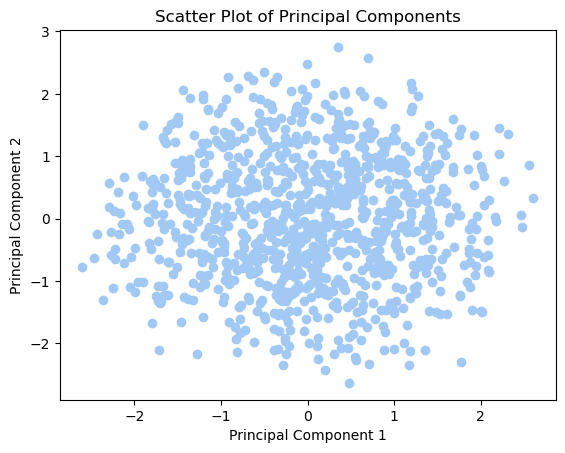

In [172]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_imputed_scaled)

# Create a DataFrame with the reduced features
df_imputed_scaled = pd.DataFrame(features_pca, columns=['Principal_Component_1', 'Principal_Component_2'])

# Visualize the scatter plot of the two principal components
plt.scatter(df_imputed_scaled['Principal_Component_1'], df_imputed_scaled['Principal_Component_2'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

In [173]:
df_imputed_scaled

,Principal_Component_1,Principal_Component_2
0,0.846505,0.969712
1,0.464141,-2.074807
2,0.133881,0.226153
3,-0.902386,-0.964215
4,-0.403473,-0.502994
...,...,...
995,0.316680,-1.033158
996,0.540097,0.394191
997,0.231063,0.534581
998,0.908840,0.114529


# K-Means Clustering

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")

inertia = []
score = []
centroid = []
silhouettes_value = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_imputed_scaled)
    label = kmeans.predict(df_imputed_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))
    centroid.append(kmeans.cluster_centers_)
    score.append(silhouette_score(df_imputed_scaled, label))
    silhouettes_value.append(silhouette_samples(df_imputed_scaled, label))

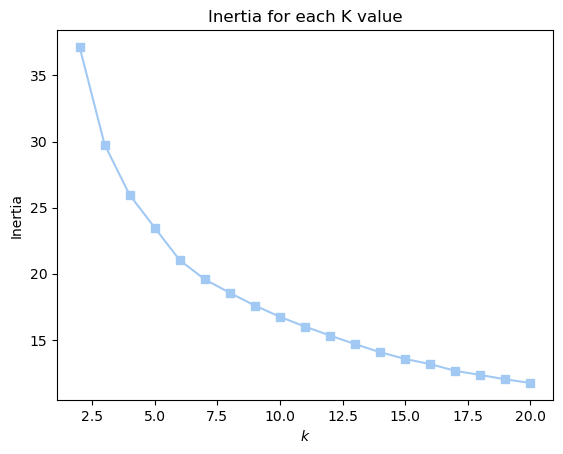

In [175]:
plt.plot(range(2, 21), inertia, marker="s")
plt.title("Inertia for each K value")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

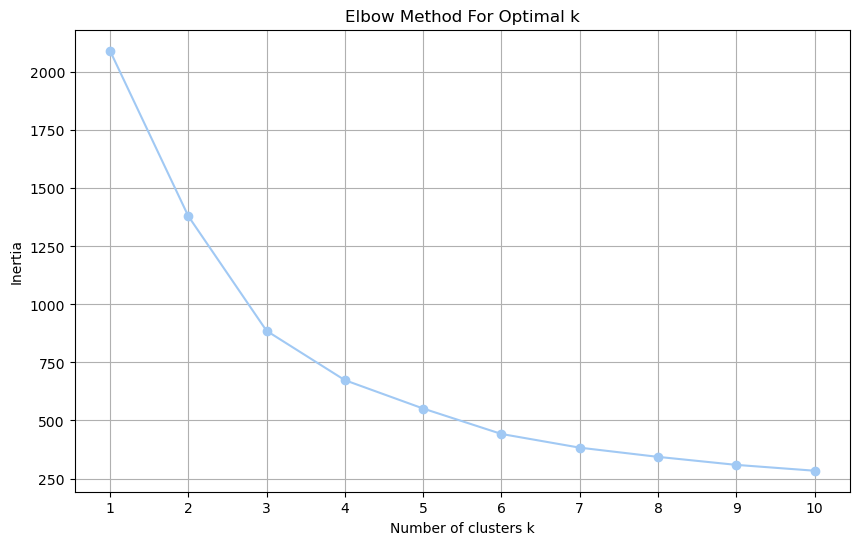

In [176]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=10).fit(df_imputed_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

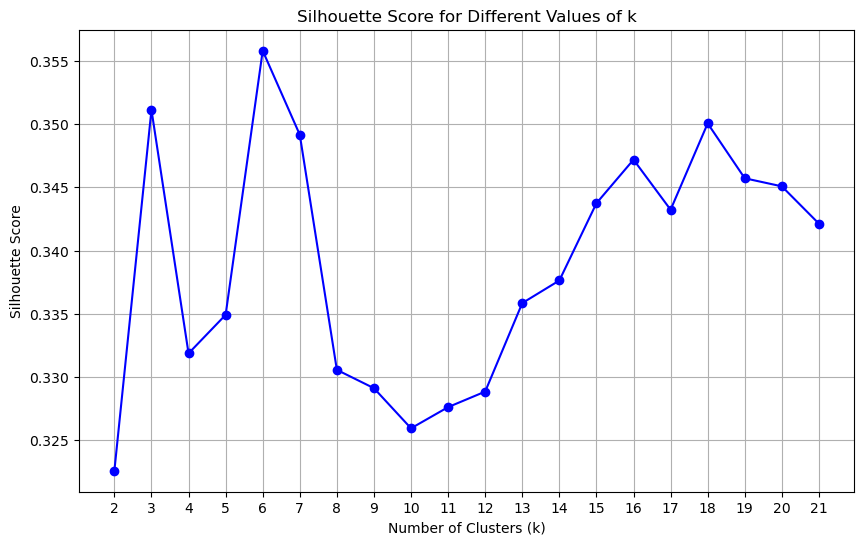

The best k value is: 6 with a silhouette score of 0.3558148867647286


In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Set the range of clusters
k_values = range(2, 22)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Fit K-Means on the scaled DataFrame
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    
    # Get the predicted labels
    labels = kmeans.labels_
    
    # Compute the silhouette score
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Find the k value with the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(k_values)
plt.grid()
plt.show()

print(f"The best k value is: {best_k} with a silhouette score of {max(silhouette_scores)}")

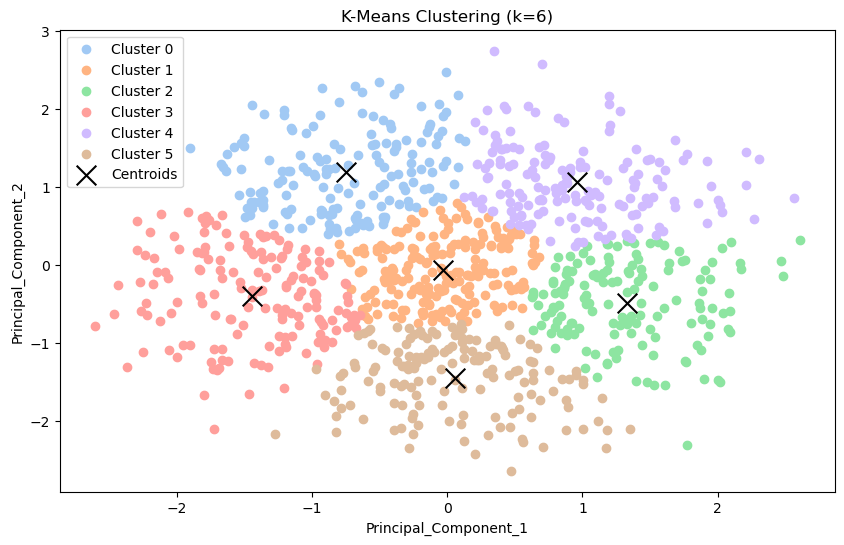

In [178]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Fit K-Means on the scaled DataFrame
kmeans = KMeans(n_clusters=k, random_state=0).fit(features)

# Add the cluster labels to the original DataFrame
df_imputed_scaled['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = df_imputed_scaled[df_imputed_scaled['Cluster'] == cluster]
    plt.scatter(cluster_points['Principal_Component_1'], cluster_points['Principal_Component_2'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.legend()
plt.show()

In [186]:
from sklearn.metrics import silhouette_score

# Fit K-Means on the scaled DataFrame
kmeans = KMeans(n_clusters=k, random_state=0).fit(features)

# Add the cluster labels to the original DataFrame
df_imputed_scaled['Cluster'] = kmeans.labels_

print("Calculate Silhouette Score for K-Means\n")
print('--------------------------------')
# Calculate silhouette score
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate inertia (within-cluster sum of squares)

inertia_value = kmeans.inertia_

print(f"Inertia: {inertia_value}")
print('--------------------------------')


Calculate Silhouette Score for K-Means

--------------------------------
Silhouette Score: 0.3558148867647286
Inertia: 441.9134085576869
--------------------------------


For n_clusters = 6, the average silhouette_score is: 0.6113183203983414


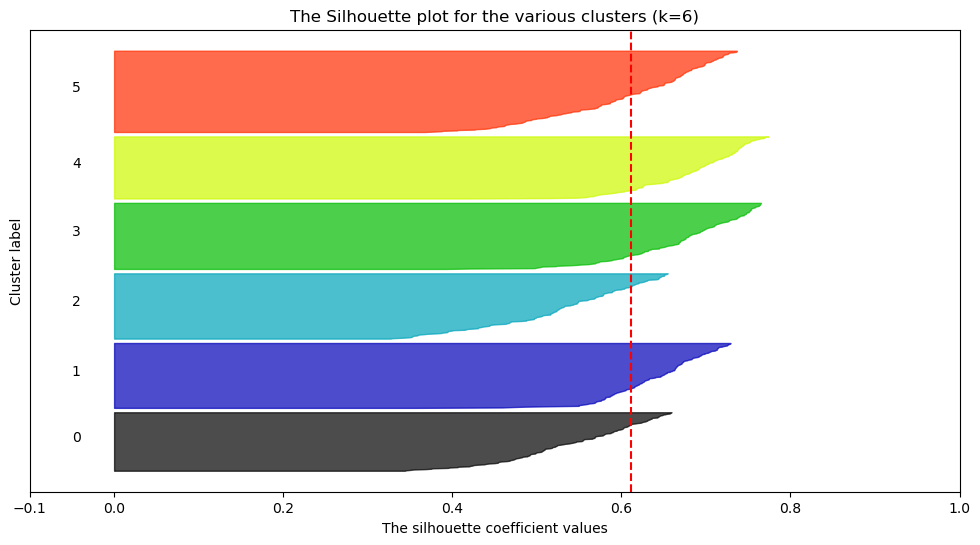

In [180]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

# Specify the desired k value
k = 6

# Calculate the number of rows and columns dynamically based on the number of k values
n_rows = 1
n_cols = 1

# Adjust the figure size
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 6))

kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df_imputed_scaled)
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df_imputed_scaled, cluster_labels)
print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")
sample_silhouette_values = silhouette_samples(df_imputed_scaled, cluster_labels)
y_lower = 10

for j in range(k):
    jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
    jth_cluster_silhouette_values.sort()
    size_cluster_j = jth_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_j
    color = cm.nipy_spectral(float(j) / k)  # Ensure this is a valid float
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
    y_lower = y_upper + 10

ax.set_title(f"The Silhouette plot for the various clusters (k={k})")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Show the plot
plt.show()

# Agglomerative Clustering

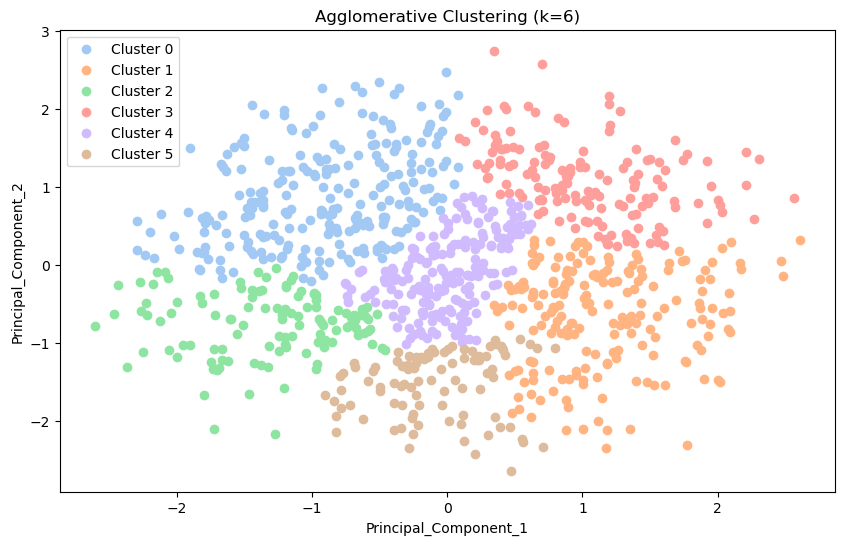

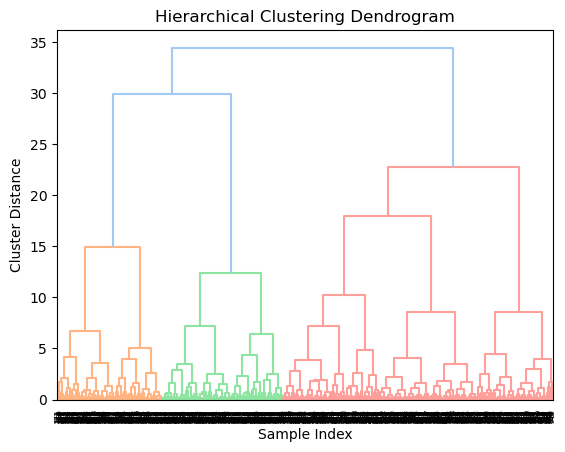

In [181]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(features)

# Add the cluster labels to the original DataFrame
df_imputed_scaled['Agglomerative_Cluster'] = agg_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_points = df_imputed_scaled[df_imputed_scaled['Agglomerative_Cluster'] == cluster]
    plt.scatter(cluster_points['Principal_Component_1'], cluster_points['Principal_Component_2'], label=f'Cluster {cluster}')

plt.title(f'Agglomerative Clustering (k={k})')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.legend()
plt.show()

# Plot the dendrogram for hierarchical structure (optional)
linked = linkage(features, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [182]:
from sklearn.metrics import silhouette_score

# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(features)

# Add the cluster labels to the original DataFrame
df_imputed_scaled['Agglomerative_Cluster'] = agg_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(features, agg_labels)
print(f"The average silhouette_score for Agglomerative Clustering (k={k}) is: {silhouette_avg}")

The average silhouette_score for Agglomerative Clustering (k=6) is: 0.2955682446902835


# GMM Clustering

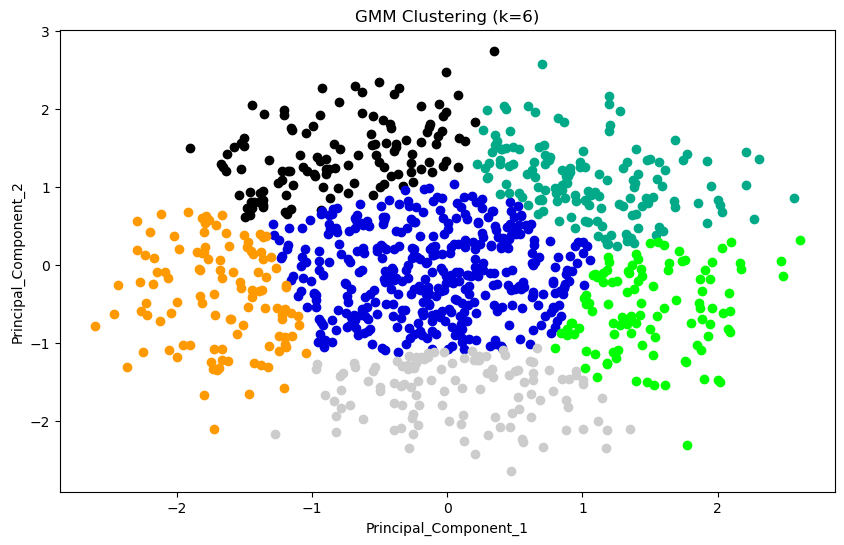

In [188]:
# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Fit GMM
gmm = GaussianMixture(n_components=k, random_state=0)
gmm_labels = gmm.fit_predict(features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster, color in zip(clusters, plt.cm.nipy_spectral(np.linspace(0, 1, k))):
    plt.scatter(cluster['Principal_Component_1'], cluster['Principal_Component_2'], color=color)

plt.title(f'GMM Clustering (k={k})')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.show()

In [189]:
# Assuming df_imputed_scaled is your DataFrame with 'Principal_Component_1' and 'Principal_Component_2'
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Fit GMM
gmm = GaussianMixture(n_components=k, random_state=0)
gmm_labels = gmm.fit_predict(features)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, gmm_labels)
print(f"For GMM clustering (k={k}), the average silhouette score is: {silhouette_avg}")

For GMM clustering (k=6), the average silhouette score is: 0.3400686954993765


# Spectal Clustering

For Spectral clustering (k=6), the average silhouette score is: 0.30162694218196284


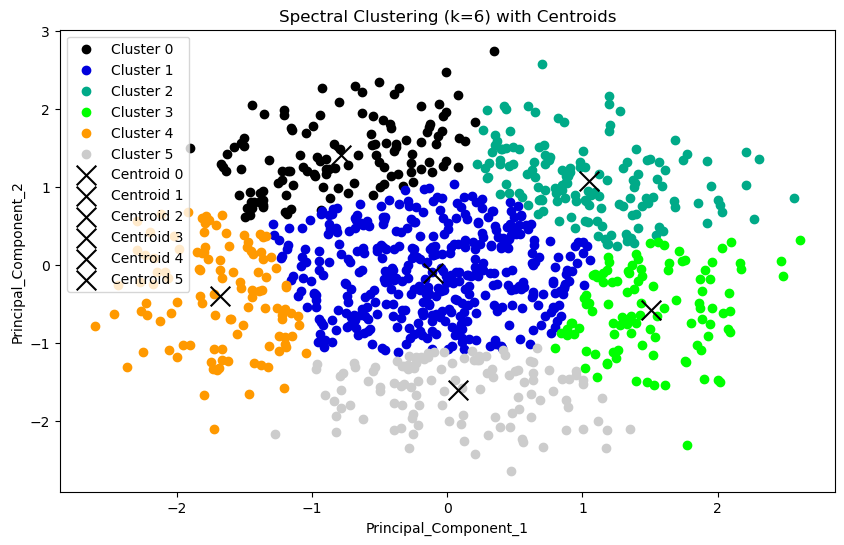

In [191]:
features = df_imputed_scaled[['Principal_Component_1', 'Principal_Component_2']]

# Specify the number of clusters (k)
k = 6  # You can adjust this based on your preference

# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=k, random_state=42)
spectral_labels = spectral_clustering.fit_predict(features)

# Add the cluster labels to the original DataFrame
df_imputed_scaled['Spectral_Cluster'] = spectral_labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, spectral_labels)
print(f"For Spectral clustering (k={k}), the average silhouette score is: {silhouette_avg}")

# Plotting the clusters and approximated centroids
plt.figure(figsize=(10, 6))
for cluster, color in zip(range(k), plt.cm.nipy_spectral(np.linspace(0, 1, k))):
    cluster_points = df_imputed_scaled[df_imputed_scaled['Spectral_Cluster'] == cluster]
    plt.scatter(cluster_points['Principal_Component_1'], cluster_points['Principal_Component_2'], color=color, label=f'Cluster {cluster}')

# Approximate centroids as mean of data points in each cluster
for cluster in range(k):
    cluster_points = df_imputed_scaled[df_imputed_scaled['Spectral_Cluster'] == cluster]
    centroid = cluster_points[['Principal_Component_1', 'Principal_Component_2']].mean()
    plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=200, label=f'Centroid {cluster}')

plt.title(f'Spectral Clustering (k={k}) with Centroids')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.legend()
plt.show()

# Final Data Analysis and Conclusion

Thus, After Imputing and Scaling the Dataset, I can come to the final conclusion that for this dataset, K-Means clustering proved to be the best model in properly grouping the dataset into the best number of clusters ( n = 6) as shown by the Silhouette Model.
